# Dog vs Cat Classification - Transfer Learning

## Transfer Learning :

## Transfer learning is a deep learning technique where we use a pretrained model.

## This pretrained model is a trained for one task , and can be retrained for a similar task with a smaller data set.
## Transfer learning gives higher accuracy compared to training models from scratch.

### Examples of Pretrained Models :

1. VGG-16 
2. ResNet50
3. Inception v3
4. Mobile Net V2
5. YOLO 

## WORKFLOW

1. Extract Data - Data From Kaggle 
2. Image processing - Image reshaping and converting into numpy arrays
3. Training AND Testing Data
4. Pretrained Mobile Net Model Trained on Dog and cat Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## END OUTPUT - 

## NEW IMAGE ---> MODEL ---> CAT/DOG Classification

Extracting Dataset using Kaggle API

In [2]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [4]:
# Kaggle api 
!kaggle competitions download -c dogs-vs-cats

 99% 804M/812M [00:08<00:00, 118MB/s]
100% 812M/812M [00:08<00:00, 99.1MB/s]


In [5]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data


In [6]:
# extracting the compressed dataset

from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

# Reading Dataset and then extracting
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [19]:
# extracting another(new) compressed dataset

from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os

# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [9]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.12418.jpg', 'dog.4948.jpg', 'cat.2410.jpg', 'dog.9792.jpg', 'dog.5372.jpg', 'dog.4388.jpg', 'cat.7272.jpg', 'dog.6085.jpg', 'cat.9625.jpg', 'dog.9590.jpg', 'dog.1638.jpg', 'cat.2525.jpg', 'dog.6272.jpg', 'dog.2121.jpg', 'cat.9683.jpg', 'cat.10391.jpg', 'cat.427.jpg', 'cat.842.jpg', 'cat.10554.jpg', 'dog.6072.jpg', 'cat.8245.jpg', 'cat.2074.jpg', 'dog.10813.jpg', 'dog.10190.jpg', 'dog.55.jpg', 'cat.7911.jpg', 'dog.11621.jpg', 'cat.6443.jpg', 'cat.10542.jpg', 'cat.9231.jpg', 'dog.11926.jpg', 'dog.391.jpg', 'cat.501.jpg', 'dog.2203.jpg', 'cat.2338.jpg', 'cat.5114.jpg', 'cat.2534.jpg', 'dog.8804.jpg', 'dog.9838.jpg', 'cat.11270.jpg', 'cat.11433.jpg', 'cat.10450.jpg', 'cat.1769.jpg', 'cat.1910.jpg', 'cat.8341.jpg', 'cat.12324.jpg', 'dog.102.jpg', 'dog.9036.jpg', 'dog.8465.jpg', 'cat.8036.jpg', 'dog.10584.jpg', 'cat.6884.jpg', 'cat.10431.jpg', 'cat.4856.jpg', 'cat.12126.jpg', 'cat.2451.jpg', 'cat.8220.jpg', 'dog.11025.jpg', 'dog.211.jpg', 'dog.4633.jpg', 'cat.7232.jpg', 'cat.11802.jpg'

Importing the Dependencies

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

Displaying the images of dogs and cats

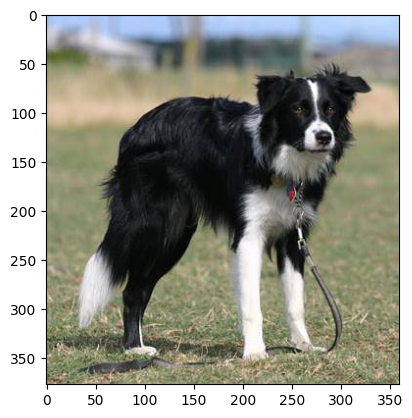

In [11]:
# display dog image
img = mpimg.imread('/content/train/dog.8144.jpg')
imgplt = plt.imshow(img)
plt.show()

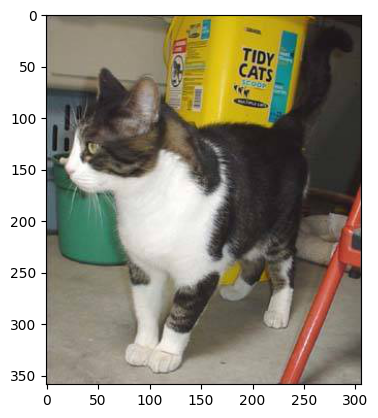

In [12]:
# display cat image
img = mpimg.imread('/content/train/cat.801.jpg')
imgplt = plt.imshow(img)
plt.show()

SINCE , All the images are of different size we need to resize them in the same common size

In [13]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])



dog
dog
cat
dog
dog


In [14]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images

In [15]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [16]:
# forward slash is because we are going to concatenate only file_name to it.

original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

# Saving the resized image in new folder

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [18]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.8144.jpg')
imgplt = plt.imshow(img)
plt.show()

FileNotFoundError: ignored

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.801.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

SO we can see if its a dog Label is 1 and if its a cat label is 0

In [ ]:
print(labels[0:5])
print(len(labels))

In [ ]:
# counting the images of dogs and cats out of 2000 images

values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'

# Not necessary here because all files are in jpg format so its a good practice 
image_extension = ['png', 'jpg']

files = []

# To read all images and say image directory + asterix and dot symbol 
# To either check if file is jpg or png and convert to numpy array
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

# numpy array to story our array taking each file and reading each file 

# asarray() This function is used to create an array by using the existing data in the form of lists, or tuples.

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

In [ ]:
type(dog_cat_images)

In [ ]:
print(dog_cat_images.shape)

2000 Images each image is of shape 224 by 224 and its a RGB image

In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

20 percent should be test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

1600 --> training images

400 --> test images

Scaling our data so all the values are between 0 - 255.

                                              white and black.
                                              SO that all values in our array is between 0 and 255

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

**Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

Model net model is from tensor flow hub 

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
# How many types of images you have.
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,  # 1st layer
    tf.keras.layers.Dense(num_of_classes)  # output Layer

])

model.summary()

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

Training Your Data

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

Saving the model


In [ ]:
export_path = '/content/drive/MyDrive/saved models/cat_vs_dog_model'
tf.saved_model.save(model, export_path)

**Predictive System**

If we pass a new image our model should able to tell if its a dog or cat

## CHECKING FOR DOG FIRST

Path of the image to be predicted: /content/dog.jpg


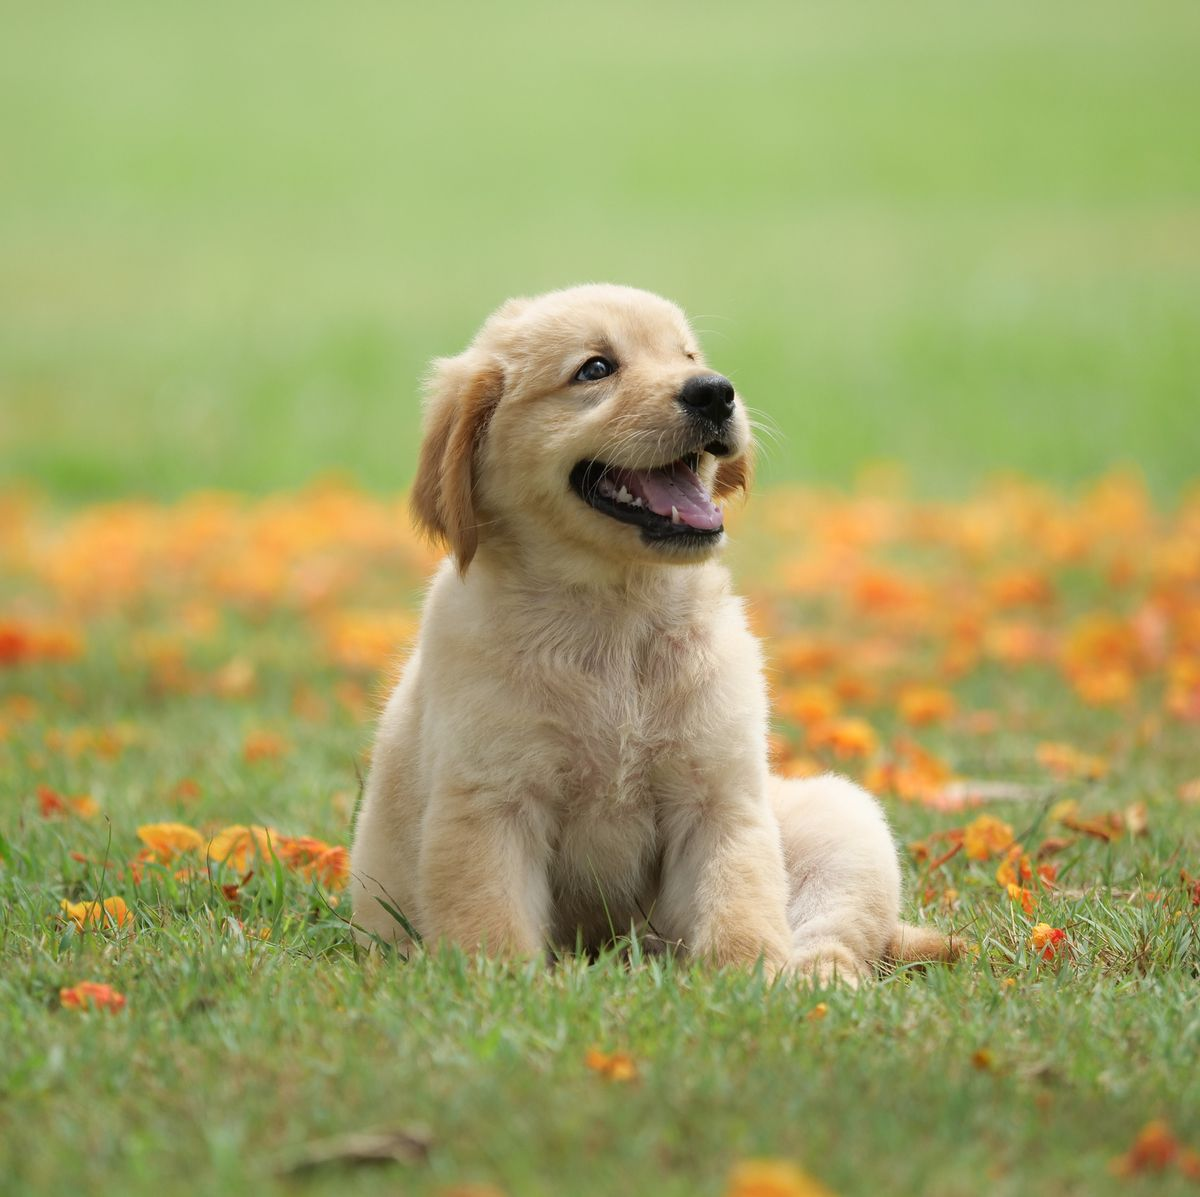

1/1 [==============================] - 1s 704ms/step
[[-2.6793668  3.936219 ]]
1
The image represents a Dog


In [ ]:
# Upload New Image
input_image_path = input('Path of the image to be predicted: ')

# convert jpg image into numpy array
input_image = cv2.imread(input_image_path)


# This is imshow from google patches and we are passing numpy array of input image
# Display our Image
cv2_imshow(input_image)


# resize image (image name , dimension) 
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255


# reshape because 
# 1 because i am telling the model to make prediction for only one image and 224 is dimension and 3 is RGB
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

# Final Prediction

input_prediction = model.predict(image_reshaped)
print(input_prediction)

# model.predict will tell if its a dog or cat
#eg [0.85] [0.15]
#so [0.85] is what is the probablity of label being 0. 85 percent chance being a cat 
# [0.15] is what is the chance of label being 1 . 15 percent chance of being a dog

# SO np,argmax will check between both which one is maximum. (Just to it in proper labels of cat and dog)
# if 0 is max then its a cat and if 1 is max its a dog

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

## CHECKING FOR CAT

Path of the image to be predicted: /content/cat.jpg


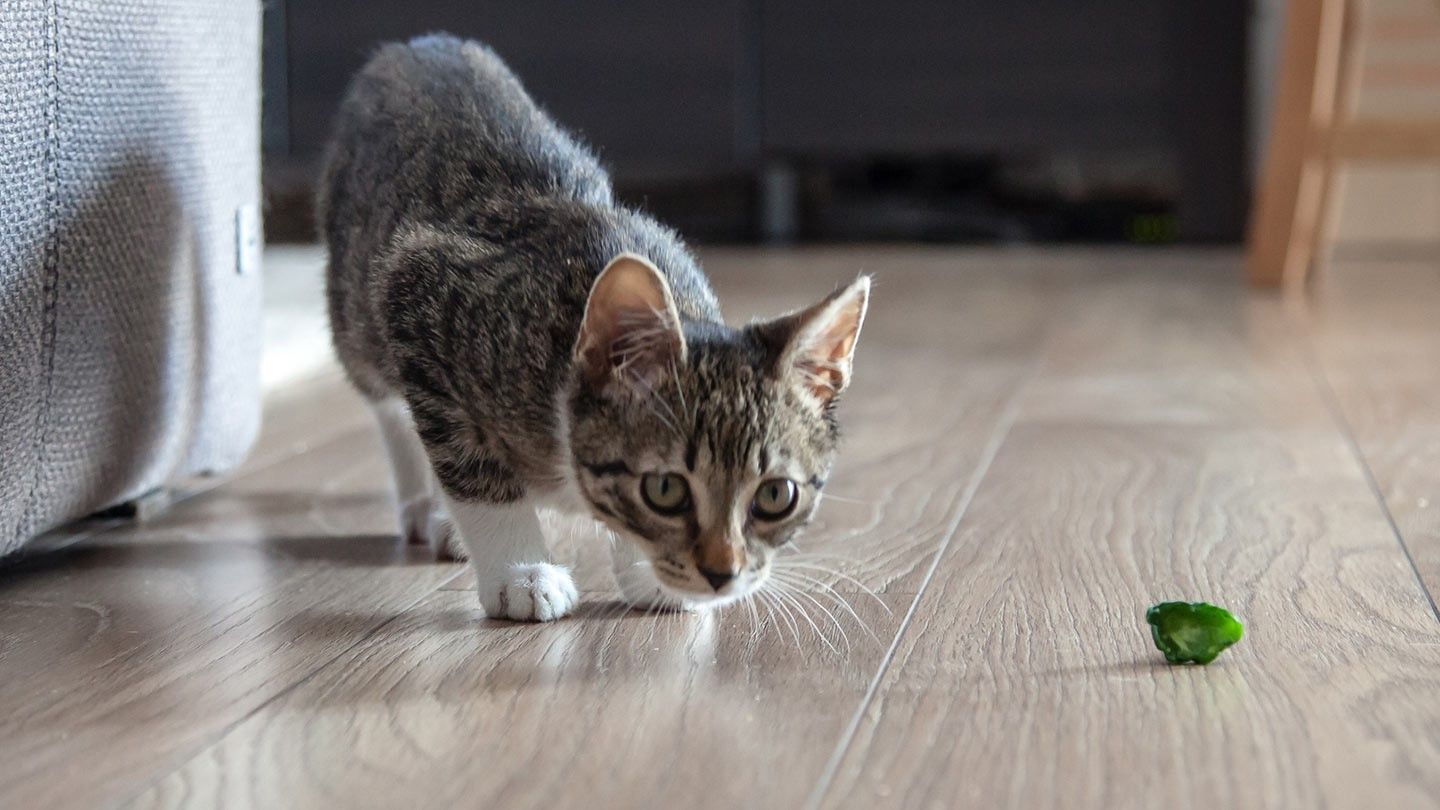

1/1 [==============================] - 0s 135ms/step
[[ 3.0069966 -4.3584337]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

#                    x-x-x-x-x-x THANK YOU -x-x-x-x-x-x 